<a href="https://colab.research.google.com/github/joel-rodgers/compiler-construction/blob/main/Lab_Activity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GROUP MEMBERS (ICS4C)

1. 122184-Joel Rodgers K'obara
2. 120226-Davies Nathan Akidiva
3. 115862-Richard Jeremy Githuba
4. 121660-Alex Wamai Kariuki
5. 120357-Bettyrose Mburu

**A. Using any TWO examples, show the conversion of NFA to DFA**

# **Example 1**

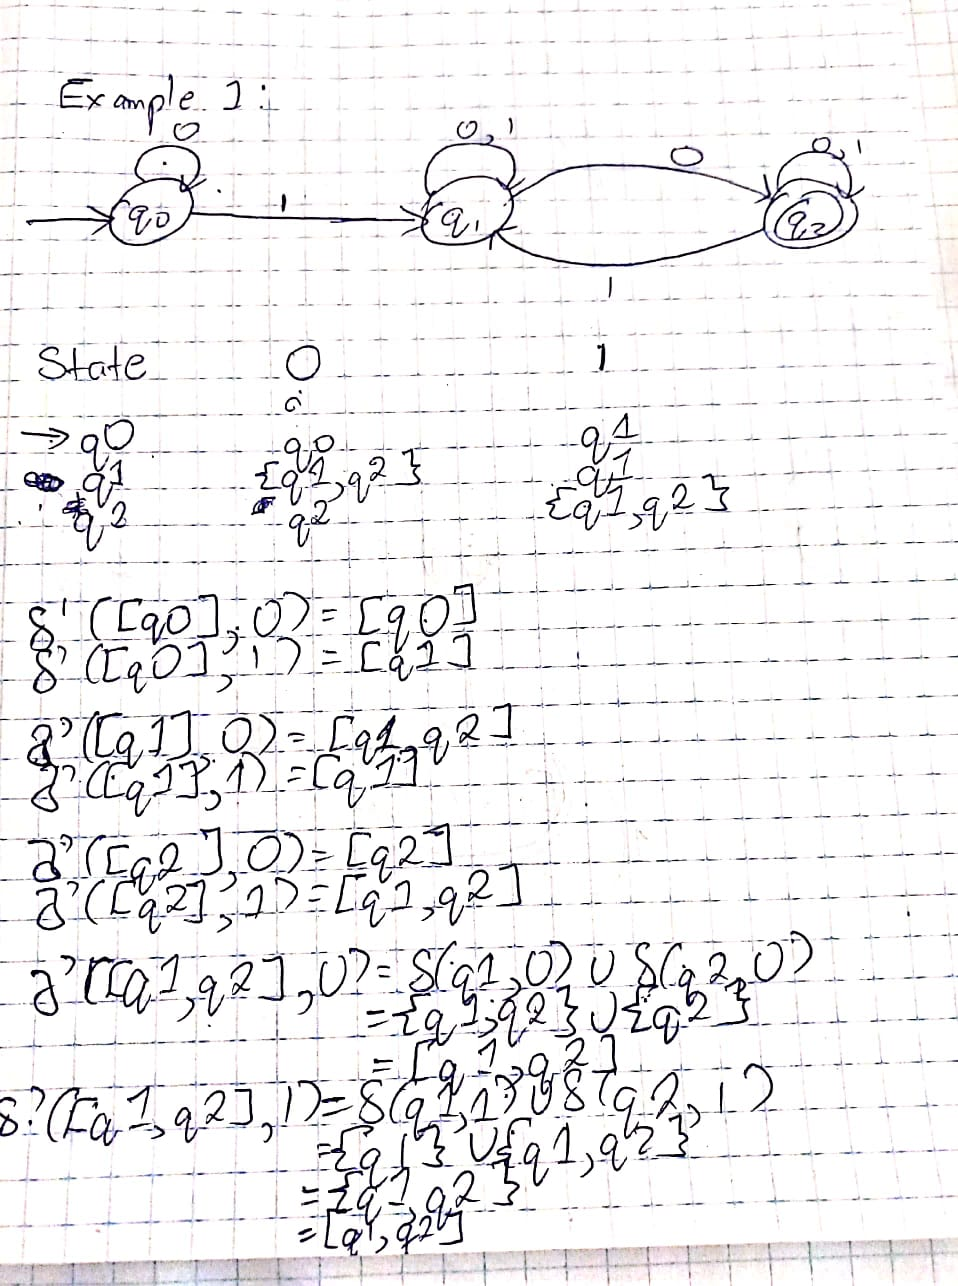

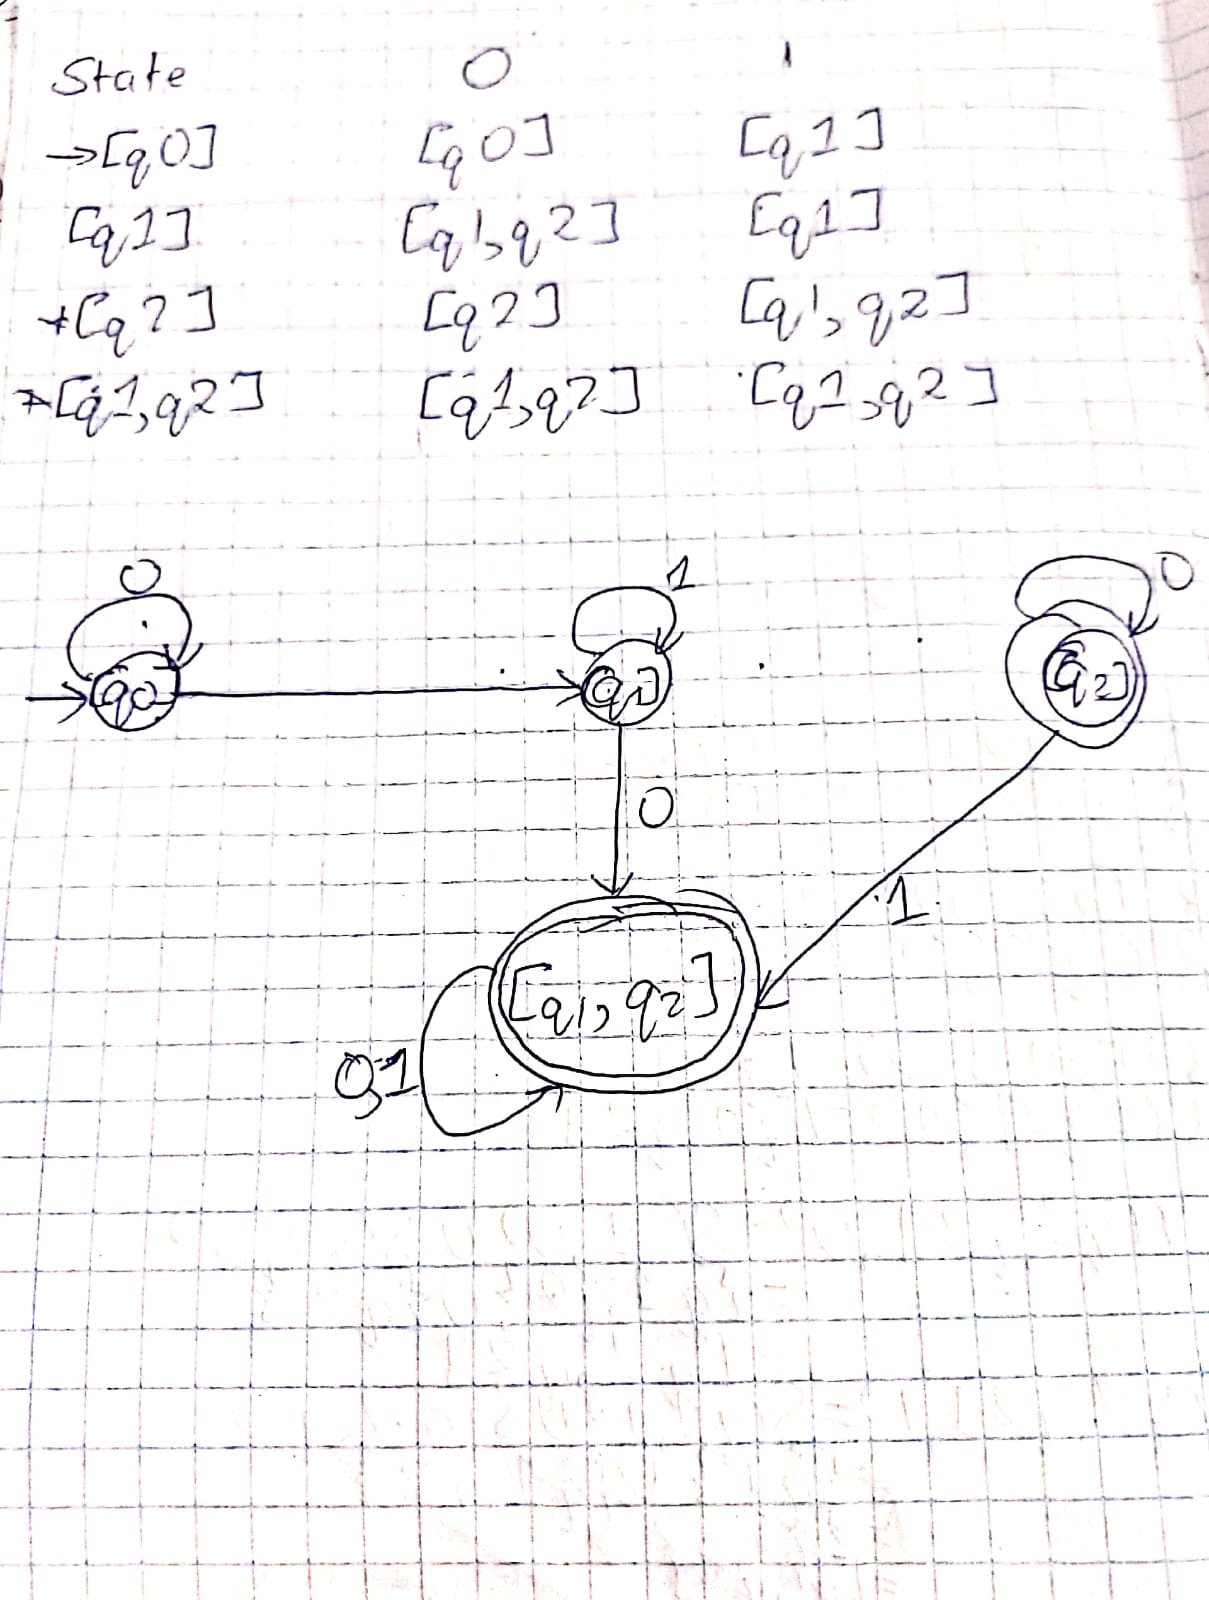

# **Example 2**

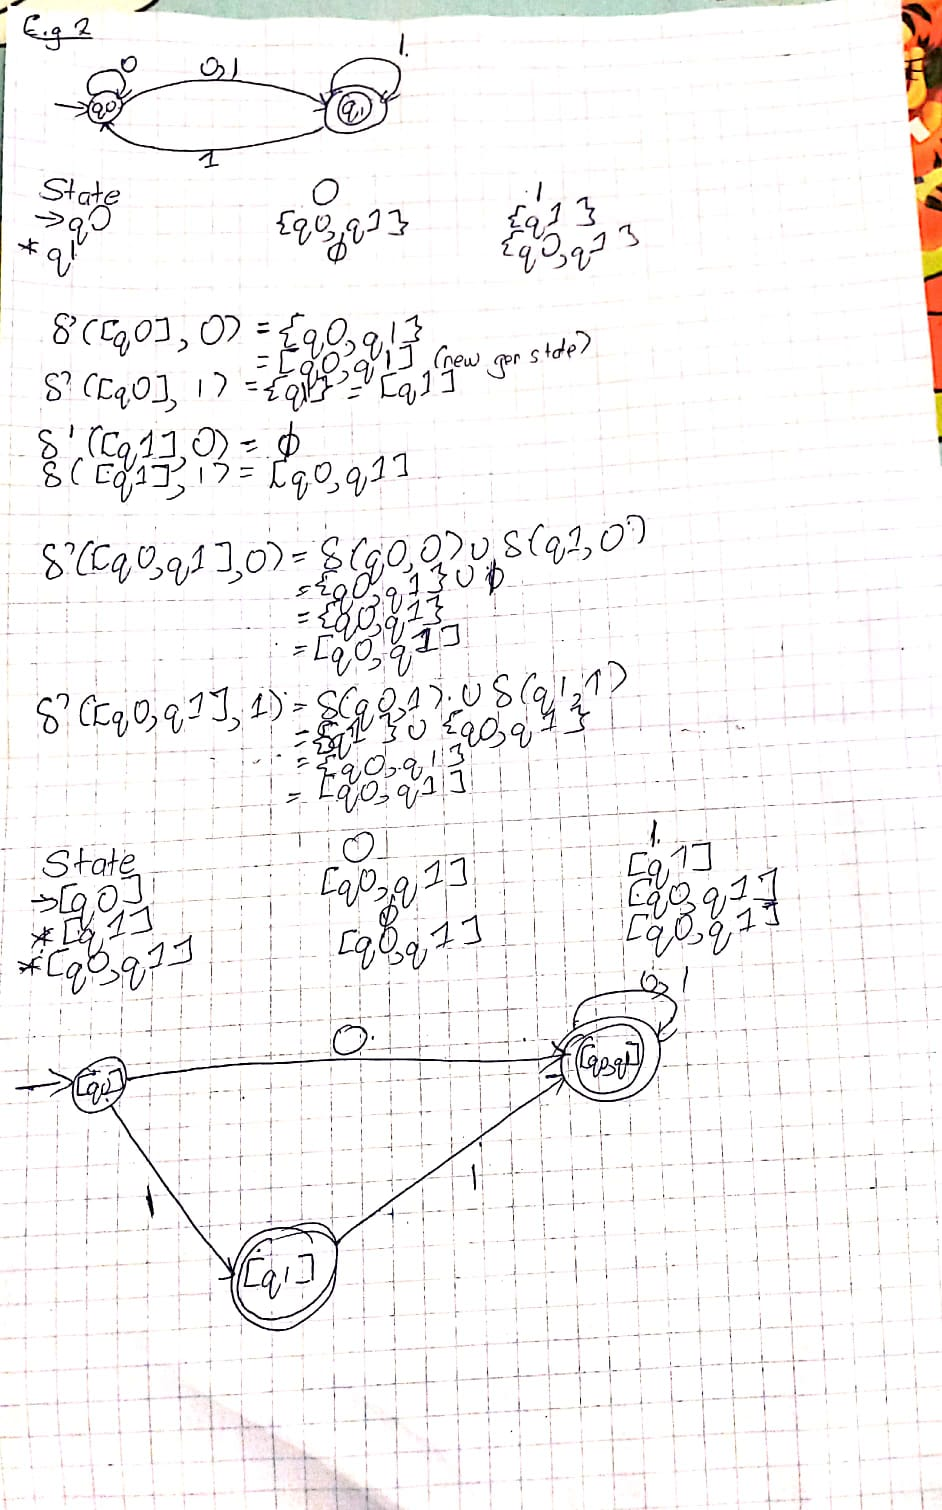

**B. How to use Flex and Bison when building a simple lexical analyzer**

**Flex**


1.  An input file describes the lexical analyzer to be generated named lex.l is written in lex language. The lex compiler transforms the lex.l to C program, in a file that is namedlex.yy.c. 
2.  The C compiler compiles lec.yy.c file into an executable file called a.out. 
3.  The output file a.out takes a stream of input characters and produces a stream of tokens






**Flex input file has 3 sections:**


*   **Definition Section**:contains the declaration of variables, regular definitions, manifest constants.
*   **Rule Section**:contains a series of rules in the form: pattern action and pattern must be unintended and action begin on the same line in {} brackets. The rule section is enclosed in “%% %%”. 
*   **User Code Section**:contains C statements and additional functions. We can also compile these functions separately and load with the lexical analyzer.





In [ ]:
/*** Definition Section ***/
%{
int count = 0;
%}

/*** Rule Section ***/
%%
[A-Z] {printf("%s capital letter\n", yytext);
       count++;}
.     {printf("%s not a capital letter\n", yytext);}
\n    {return 0;}
%%

/*** User Code Section ***/
int yywrap(){}
int main(){

// Explanation:
// yywrap() - wraps the above rule section
/* yyin - takes the file pointer
          which contains the input*/
/* yylex() - this is the main flex function
          which runs the Rule Section*/
// yytext is the text in the buffer



yylex();
printf("\nNumber of Captial letters "
      "in the given input - %d\n", count);

return 0;
}

**In order to run the code above:**
*   Save code in a file with lex.l extension
*   Open cmd and change the directory to where the file is stored
*   Run the commands listed below







In [ ]:
flex Caps.l
gcc lex.yy.c
a.exe

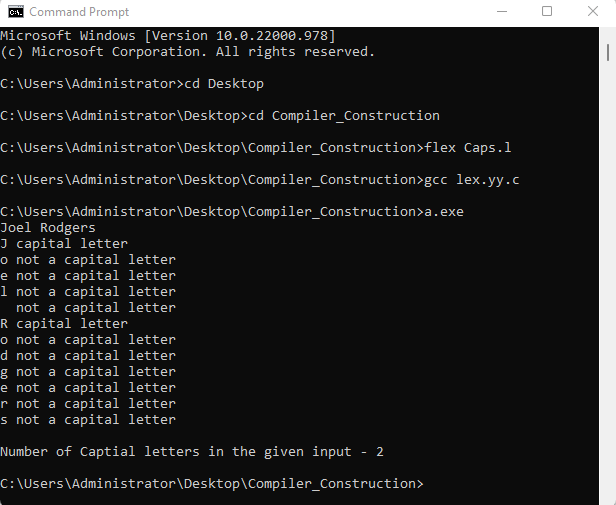

**Bison**

Bison is a general-purpose parser generator that converts a grammar description (Bison Grammar Files) for an LALR(1) context-free grammar into a C program to parse that grammar. The Bison parser is a bottom-up parser. It tries, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start-symbol.

**Steps to use Bison:**


1.   Write a lexical analyzer to process input and pass tokens to the parser (calc.lex).
2.   Write the grammar specification for bison (calc.y), including grammar rules, yyparse() and yyerror().
3.   Run Bison on the grammar to produce the parser. (Makefile)
4.   Compile the code output by Bison, as well as any other source files.
5.   Link the object files to produce the finished product.







**Step 1**:Write a lexical analyzer to process input and pass tokens to the parser (calc.lex).

In [ ]:
/* Mini Calculator */
/* calc.lex */

%{
#include "heading.h"
#include "tok.h"
int yyerror(char *s);
int yylineno = 1;
%}

digit		[0-9]
int_const	{digit}+

%%

{int_const}	{ yylval.int_val = atoi(yytext); return INTEGER_LITERAL; }
"+"		{ yylval.op_val = new std::string(yytext); return PLUS; }
"*"		{ yylval.op_val = new std::string(yytext); return MULT; }

[ \t]*		{}
[\n]		{ yylineno++;	}

.		{ std::cerr << "SCANNER "; yyerror(""); exit(1);	}

**Step 2**:Write the grammar specification for bison (calc.y), including grammar rules, yyparse() and yyerror().

In [ ]:
/* Mini Calculator */
/* calc.y */

%{
#include "heading.h"
int yyerror(char *s);
int yylex(void);
%}

%union{
  int		int_val;
  string*	op_val;
}

%start	input 

%token	<int_val>	INTEGER_LITERAL
%type	<int_val>	exp
%left	PLUS
%left	MULT

%%

input:		/* empty */
		| exp	{ cout << "Result: " << $1 << endl; }
		;

exp:		INTEGER_LITERAL	{ $$ = $1; }
		| exp PLUS exp	{ $$ = $1 + $3; }
		| exp MULT exp	{ $$ = $1 * $3; }
		;

%%

int yyerror(string s)
{
  extern int yylineno;	// defined and maintained in lex.c
  extern char *yytext;	// defined and maintained in lex.c
  
  cerr << "ERROR: " << s << " at symbol \"" << yytext;
  cerr << "\" on line " << yylineno << endl;
  exit(1);
}

int yyerror(char *s)
{
  return yyerror(string(s));
}

**Step 3**:Run Bison on the grammar to produce the parser. (Makefile)

In [ ]:
# Makefile

OBJS	= bison.o lex.o main.o

CC	= g++
CFLAGS	= -g -Wall -ansi -pedantic

calc:		$(OBJS)
		$(CC) $(CFLAGS) $(OBJS) -o calc -lfl

lex.o:		lex.c
		$(CC) $(CFLAGS) -c lex.c -o lex.o

lex.c:		calc.lex 
		flex calc.lex
		cp lex.yy.c lex.c

bison.o:	bison.c
		$(CC) $(CFLAGS) -c bison.c -o bison.o

bison.c:	calc.y
		bison -d -v calc.y
		cp calc.tab.c bison.c
		cmp -s calc.tab.h tok.h || cp calc.tab.h tok.h

main.o:		main.cc
		$(CC) $(CFLAGS) -c main.cc -o main.o

lex.o yac.o main.o	: heading.h
lex.o main.o		: tok.h

clean:
	rm -f *.o *~ lex.c lex.yy.c bison.c tok.h calc.tab.c calc.tab.h calc.output calc


**Step 4**:Compile the code output by Bison, as well as any other source files.

**Step 5**:Link the object files to produce the finished product.